# Model Training

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
SEED = 2024

## Load Data

In [32]:
data = pd.read_csv('data/ALL_DATA.csv')
data.head()

,landmark_0,landmark_1,landmark_2,landmark_3,landmark_4,landmark_5,landmark_6,landmark_7,landmark_8,landmark_9,...,landmark_33,landmark_34,landmark_35,landmark_36,landmark_37,landmark_38,landmark_39,landmark_40,landmark_41,class
0,0.159000,0.666357,0.235371,0.642763,0.287188,0.556211,0.299969,0.469542,0.284877,0.411984,...,0.519484,0.107448,0.487387,0.115637,0.442043,0.131667,0.499021,0.132779,0.520769,A
1,0.730418,0.639925,0.641664,0.614853,0.571825,0.524570,0.543479,0.426797,0.547046,0.346194,...,0.483906,0.759390,0.426419,0.725754,0.395490,0.717229,0.467432,0.733937,0.478028,A
2,0.288732,0.620983,0.352410,0.602924,0.398823,0.518350,0.410077,0.444521,0.404415,0.387958,...,0.480463,0.234916,0.445297,0.248738,0.411877,0.258917,0.460723,0.255216,0.478716,A
3,0.791488,0.521460,0.698617,0.490914,0.634692,0.404167,0.612870,0.302061,0.613459,0.224863,...,0.361465,0.821999,0.315867,0.800593,0.275398,0.791100,0.344033,0.798526,0.362661,A
4,0.307014,0.618451,0.371961,0.598051,0.417348,0.514910,0.429301,0.441463,0.424621,0.385036,...,0.476655,0.257219,0.441661,0.265523,0.405175,0.277522,0.454974,0.278168,0.477177,A


In [33]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

class_names = label_encoder.classes_

In [34]:
data.shape

(4222, 43)

In [35]:
target = data['class']
data = data.drop('class', axis=1)

## Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size=0.3, 
    random_state=SEED
)

In [37]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [38]:
X_train.shape, X_test.shape

((2955, 42), (1267, 42))

In [39]:
y_train.shape, y_test.shape

((2955,), (1267,))

## Model

In [40]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(28, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 28)             │           924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,660 (68.98 KB)

 Trainable params: 17,212 (67.23 KB)

 Non-trainable params: 448 (1.75 KB)

In [41]:
history = model.fit(
    X_train, 
    y_train_encoded, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2
)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.0711 - loss: 3.5650 - val_accuracy: 0.0609 - val_loss: 3.2907
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2314 - loss: 2.6541 - val_accuracy: 0.0372 - val_loss: 3.2396
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3675 - loss: 2.1487 - val_accuracy: 0.1049 - val_loss: 3.0000
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4810 - loss: 1.7516 - val_accuracy: 0.1760 - val_loss: 2.6929
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6301 - loss: 1.3821 - val_accuracy: 0.2538 - val_loss: 2.3299
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6604 - loss: 1.1741 - val_accuracy: 0.3942 - val_loss: 1.9094
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7402 - loss: 0.9565 - val_accuracy: 0.5431 - val_loss: 1.3295
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7833 - loss: 0.8038 - val_accuracy: 0.6565 - val_loss:

In [42]:
model.save('asl_classifier_model.keras')

## Model Evaluation

In [43]:
from sklearn.metrics import classification_report

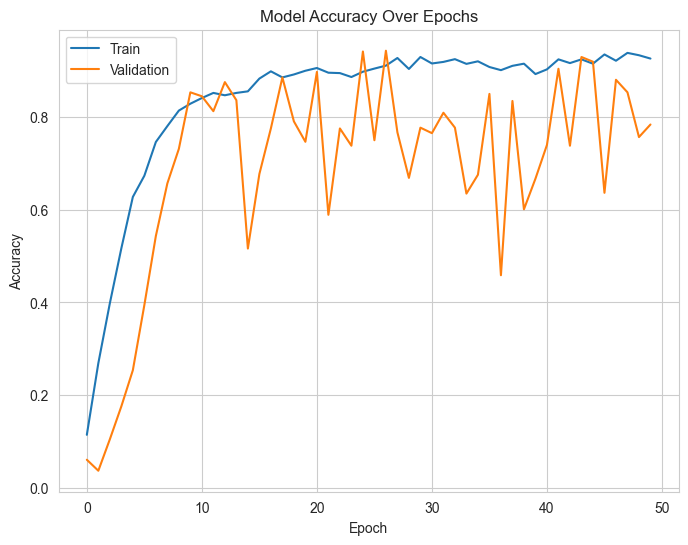

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

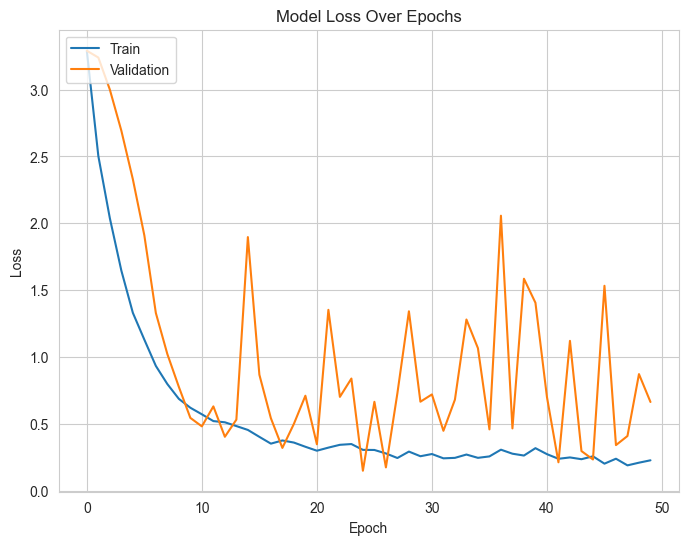

In [45]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7497 - loss: 0.7343
Test loss: 0.7689791917800903
Test accuracy: 0.7434885501861572


In [47]:
# Get predicted probabilities 
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [48]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           A       0.77      0.68      0.72        40
           B       1.00      0.88      0.94        51
           C       0.91      1.00      0.95        42
           D       0.28      1.00      0.44        38
           E       0.72      0.54      0.62        54
           F       1.00      0.36      0.52        45
           G       0.75      1.00      0.86        58
           H       1.00      0.80      0.89        50
           I       0.51      1.00      0.68        41
           J       1.00      0.96      0.98        46
           K       0.98      1.00      0.99        51
           L       1.00      0.60      0.75        48
           M       1.00      0.88      0.93        40
           N       0.76      1.00      0.87        42
           O       0.46      0.44      0.45        48
           P       1.00      1.00      1.00        43
           Q       1.00      1.00      1.00        37
           R       0.60    

D:\UVG\DeepLearning\DL-ASL-Recognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\UVG\DeepLearning\DL-ASL-Recognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\UVG\DeepLearning\DL-ASL-Recognition\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()

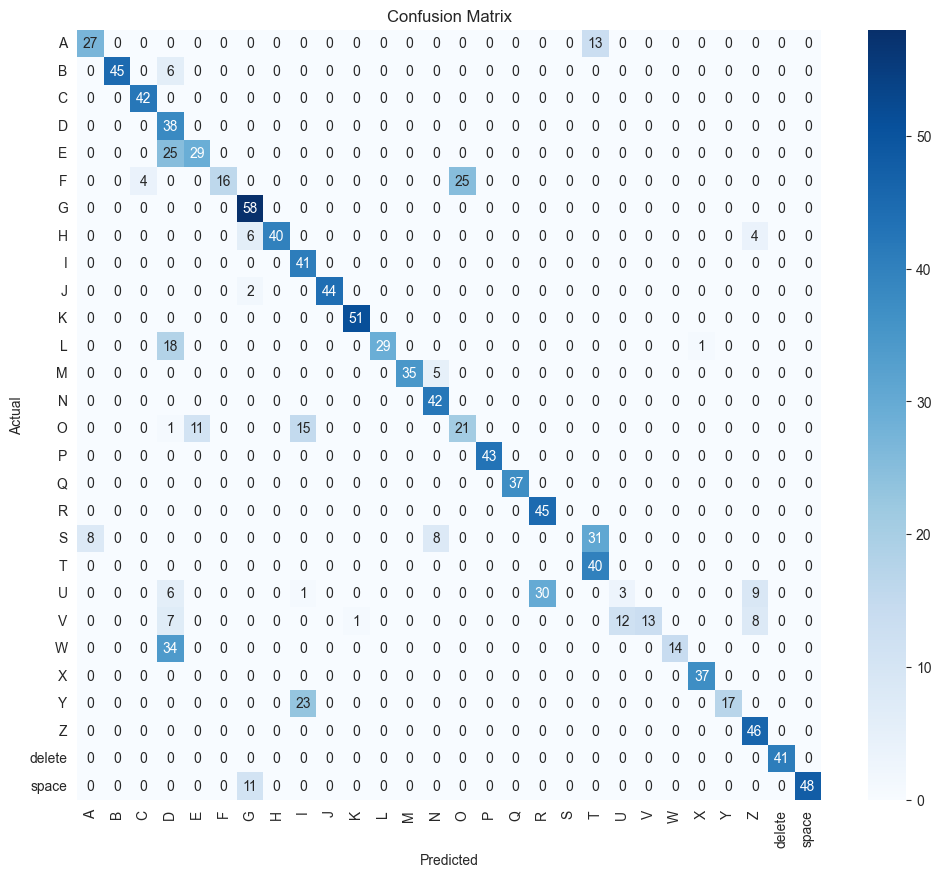

In [49]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()